In [1]:
import NN_Module as nnm
import torch
import numpy as np
import numpy.ma as ma
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
from pandas import read_csv
import argparse
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
out_file = '3169_0'

In [3]:
names = {}
names['cQei'] = 0
names['cQl3i'] = 1
names['cQlMi'] = 2
names['cbW'] = 3
names['cpQ3'] = 4
names['cpQM'] = 5
names['cpt'] = 6
names['cptb'] = 7
names['ctG'] = 8
names['ctW'] = 9
names['ctZ'] = 10
names['ctei'] = 11
names['ctlSi'] = 12
names['ctlTi'] = 13
names['ctli'] = 14
names['ctp'] = 15

WC_to_analyze_1 = ['cpQ3', 'cpQM', 'cpt', 'cptb', 'cQei', 'ctei', 'ctli', 'ctW'] # The first of the two WCs to graph
WC_to_analyze_2 = ['cbW', 'ctG', 'ctp', 'cQl3i', 'cQlMi', 'ctlTi', 'ctlSi', 'ctZ'] # The second of the two WCs to graph

In [4]:
save_dict = torch.load(f'./{out_file}_model+.pt')
best_model_state = save_dict['model']
parameters_save = save_dict['parameters']
input_stats = save_dict['input_stats']
output_stats = save_dict['output_stats']

In [5]:
# Check to make sure we're on cuda
input_stats[0].device

device(type='cuda', index=0)

In [6]:
# Examine the npz files containing data in CMS-TOP-19-001
loaded = np.load(f'likelihood_cpQ3_cbW.npz')
for x in loaded.keys():
    print (x)

deltaNLL
cpQ3
cbW


In [7]:
loaded['cpQ3'].shape

(90030,)

In [8]:
loaded['cbW'].shape

(90030,)

In [9]:
loaded['deltaNLL'].shape

(90030,)

In [10]:
loaded['cbW'][9004]

-9.966666

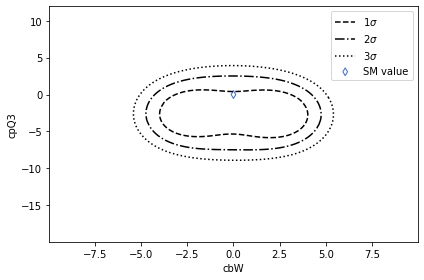

In [45]:
# Make the contour plot
# Found this table for the values of 1, 2, and 3 sigmas: http://www.reid.ai/2012/09/chi-squared-distribution-table-with.html
fig, ax = plt.subplots()
actual_contour = ax.tricontour(loaded['cbW'], loaded['cpQ3'], 2*loaded['deltaNLL'], colors='k', linestyles=['dashed', 'dashdot', 'dotted'], levels=[2.30, 6.18, 11.83]) # 1, 2, and 3 sigmas
SM_value = ax.scatter(0, 0, marker='d', c='none', ec='royalblue', s=30, linewidths=1)
ax.legend(actual_contour.collections+[SM_value], ['$1\sigma$', '$2\sigma$', '$3\sigma$', 'SM value'])
ax.set_xlabel('cbW')
ax.set_ylabel('cpQ3')
fig.tight_layout()

In [ ]:
# Test out a simple contour plot
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [ ]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')